**Árboles de Decisión**

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

<h1>1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc. </h1>>

In [2]:
# Cargamos el dataset y mostramos las 10 primeras filas

archivo = pd.read_csv("Calidad_Del_Vino.csv")
archivo.head(10)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruro,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
# Descripción de los datos
archivo.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruro,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Obtener los tipos de dato de cada columna
tipos_de_dato_por_columna = archivo.dtypes

# Mostrar los tipos de dato en pantalla
print("Tipos de dato por columna:")
print(tipos_de_dato_por_columna)

Tipos de dato por columna:
acidez_fija             float64
acidez_volatil          float64
acido_citrico           float64
azucar_residual         float64
cloruro                 float64
dioxido_azufre_libre    float64
dioxido_azufre_total    float64
densidad                float64
pH                      float64
sulfatos                float64
alcohol                 float64
calidad                   int64
dtype: object


Text(0.5, 1.0, 'Identificación de Datos Atípicos del azucar residual')

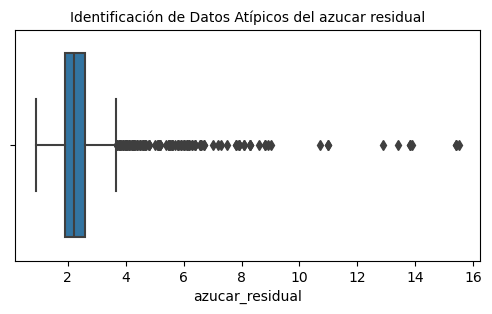

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['azucar_residual'])
plt.title('Identificación de Datos Atípicos del azucar residual', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos de la acidez fija')

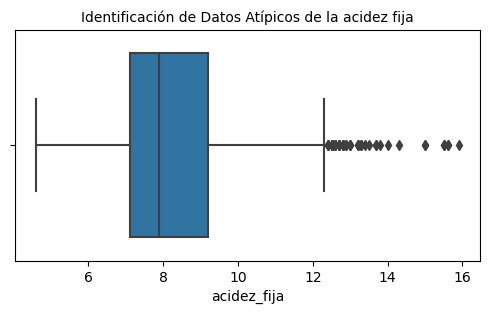

In [6]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['acidez_fija'])
plt.title('Identificación de Datos Atípicos de la acidez fija', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Atípicos del cloruro')

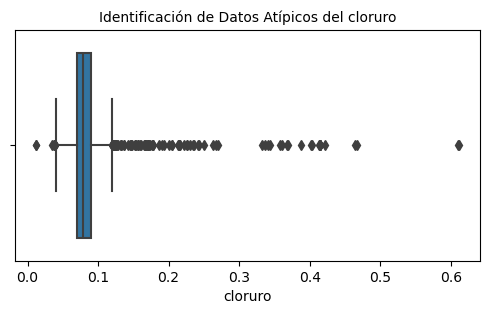

In [7]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=archivo['cloruro'])
plt.title('Identificación de Datos Atípicos del cloruro', fontsize=10 )

In [8]:
# Calcular una tabla de contingencia entre dos variables categóricas
tabla_contingencia = pd.crosstab(archivo['calidad'], archivo['alcohol'])

# Visualizar la tabla de contingencia
print(tabla_contingencia)

# Realizar una prueba chi-cuadrado para evaluar la asociación entre las variables categóricas
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(tabla_contingencia)
print(f"Valor p de la prueba chi-cuadrado: {p}")

alcohol  8.400000   8.500000   8.700000   8.800000   9.000000   9.050000   \
calidad                                                                     
3                1          0          0          0          1          0   
4                0          0          0          0          2          1   
5                0          1          0          2         11          0   
6                1          0          2          0         16          0   
7                0          0          0          0          0          0   
8                0          0          0          0          0          0   

alcohol  9.100000   9.200000   9.233333   9.250000   ...  13.000000  \
calidad                                              ...              
3                0          0          0          0  ...          0   
4                2          3          0          0  ...          0   
5               14         50          0          0  ...          4   
6                7         1

<h1>2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario</h1>.

In [9]:
# Búsqueda de registros vacios
registros_vacios = archivo.isnull().sum()
print (registros_vacios)

acidez_fija             0
acidez_volatil          0
acido_citrico           0
azucar_residual         0
cloruro                 0
dioxido_azufre_libre    0
dioxido_azufre_total    0
densidad                0
pH                      0
sulfatos                0
alcohol                 0
calidad                 0
dtype: int64


In [10]:
# Guarda la cantidad de registros antes de eliminar los nulos
registros_antes = len(archivo)

# Elimina los registros nulos
archivo = archivo.dropna()

# Guarda la cantidad de registros después de eliminar los nulos
registros_despues = len(archivo)

# Calcula la cantidad de registros eliminados
registros_eliminados = registros_antes - registros_despues

print("Cantidad de registros eliminados:", registros_eliminados)

Cantidad de registros eliminados: 0


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

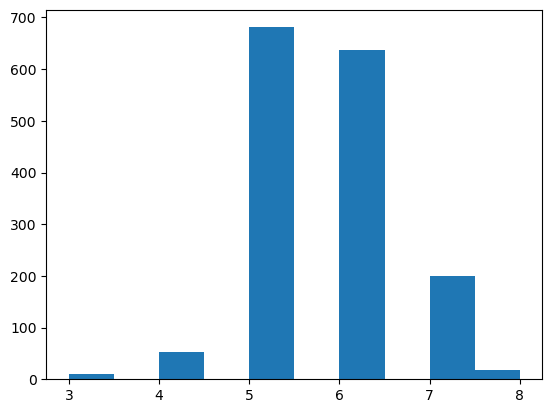

In [11]:
plt.hist(archivo.calidad)

<Axes: xlabel='acido_citrico', ylabel='densidad'>

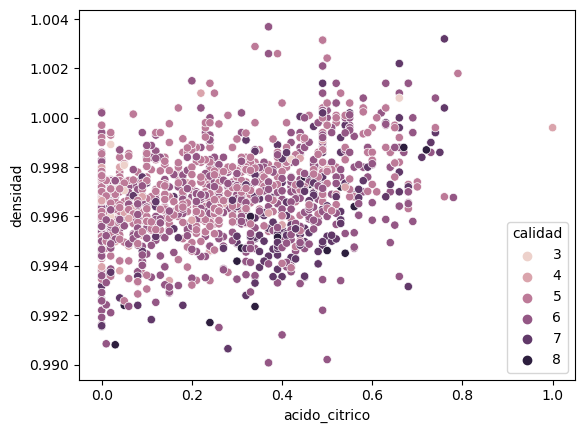

In [12]:
sns.scatterplot( x = "acido_citrico", y = "densidad", hue = "calidad", data = archivo)

<h1>4.Entrenar el modelo configurando los diferentes
hiperparámetros.</h1>

In [13]:
# variables predictoras
predictors_col = ["acidez_fija","acidez_volatil","acido_citrico","acido_citrico","azucar_residual","dioxido_azufre_total"
                  ,"densidad","pH","sulfatos","alcohol"]
target_col = ['calidad'] # Variable a predecir

In [14]:
predictors = archivo[predictors_col]
target = archivo[target_col]

In [15]:
predictors

,acidez_fija,acidez_volatil,acido_citrico,acido_citrico,azucar_residual,dioxido_azufre_total,densidad,pH,sulfatos,alcohol
0,7.4,0.700,0.00,0.00,1.9,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.00,2.6,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.04,2.3,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.56,1.9,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.00,1.9,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.08,2.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.10,2.2,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.13,2.3,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.12,2.0,44.0,0.99547,3.57,0.71,10.2


In [26]:
target

,calidad
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [16]:
corr = predictors.corr()
corr

,acidez_fija,acidez_volatil,acido_citrico,acido_citrico,azucar_residual,dioxido_azufre_total,densidad,pH,sulfatos,alcohol
acidez_fija,1.000000,-0.256131,0.671703,0.671703,0.114777,-0.113181,0.668047,-0.682978,0.183006,-0.061668
acidez_volatil,-0.256131,1.000000,-0.552496,-0.552496,0.001918,0.076470,0.022026,0.234937,-0.260987,-0.202288
acido_citrico,0.671703,-0.552496,1.000000,1.000000,0.143577,0.035533,0.364947,-0.541904,0.312770,0.109903
acido_citrico,0.671703,-0.552496,1.000000,1.000000,0.143577,0.035533,0.364947,-0.541904,0.312770,0.109903
azucar_residual,0.114777,0.001918,0.143577,0.143577,1.000000,0.203028,0.355283,-0.085652,0.005527,0.042075
dioxido_azufre_total,-0.113181,0.076470,0.035533,0.035533,0.203028,1.000000,0.071269,-0.066495,0.042947,-0.205654
densidad,0.668047,0.022026,0.364947,0.364947,0.355283,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.541904,-0.085652,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulfatos,0.183006,-0.260987,0.312770,0.312770,0.005527,0.042947,0.148506,-0.196648,1.000000,0.093595
alcohol,-0.061668,-0.202288,0.109903,0.109903,0.042075,-0.205654,-0.496180,0.205633,0.093595,1.000000


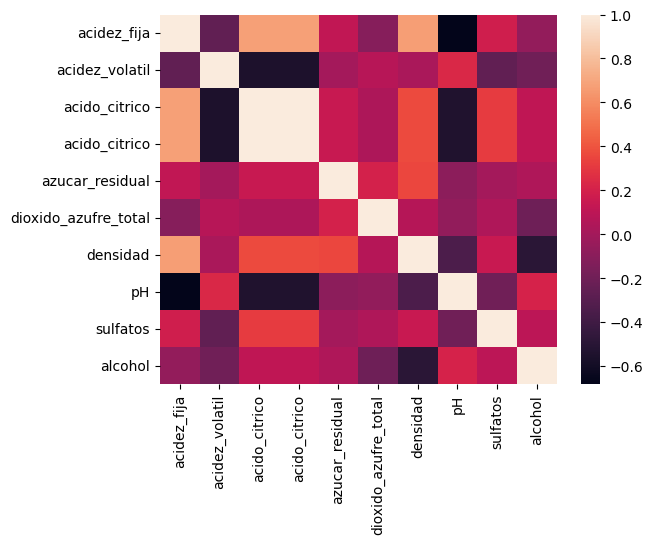

In [17]:
# Mapa de calor
sns.heatmap(corr)
plt.show()

<h1>4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.</h1>

In [28]:
X_train, X_test, y_train, y_test = train_test_split(predictors,target, test_size=0.25, random_state=13)

In [19]:
tree = DecisionTreeClassifier() # Crear Arbol de desicion

<h1>5. Entrenar el modelo configurando los diferentes
hiperparámetros.</h1>

In [20]:
arbol = tree.fit(X_train, y_train)

[Text(0.49685566575768236, 0.9772727272727273, 'x[9] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8, 42, 500, 487, 150, 12]'),
 Text(0.24743523486981, 0.9318181818181818, 'x[8] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5, 27, 423, 246, 24, 0]'),
 Text(0.04116819141449683, 0.8863636363636364, 'x[1] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.02345765892563922, 0.8409090909090909, 'x[2] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.019704433497536946, 0.7954545454545454, 'x[8] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.01595120806943467, 0.75, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.02345765892563922, 0.75, 'x[5] <= 33.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.019704433497536946, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.027210884353741496, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = 

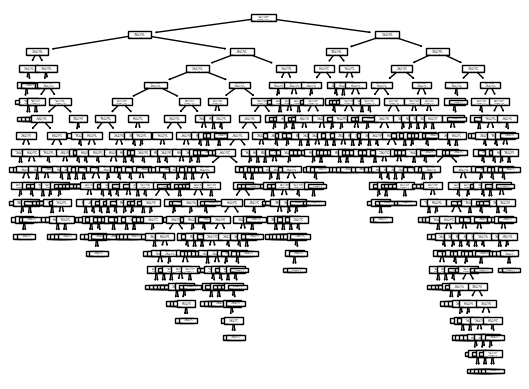

In [21]:
plot_tree(arbol)

In [22]:
predicciones = arbol.predict(X_test)

In [27]:
predicciones

array([7, 4, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 5, 7, 5, 6,
       7, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6, 7, 6, 6,
       5, 6, 6, 6, 7, 6, 7, 5, 6, 5, 7, 5, 5, 6, 7, 5, 5, 6, 5, 5, 6, 7,
       6, 5, 5, 6, 6, 5, 8, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       7, 7, 6, 6, 4, 7, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 7,
       7, 6, 6, 6, 5, 6, 7, 7, 5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 6,
       5, 7, 5, 5, 7, 5, 6, 7, 6, 5, 5, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 5, 7, 6, 6, 4, 6, 6, 6, 5, 4, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 7, 5, 7, 7,
       5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 5, 5, 7,
       5, 5, 7, 6, 7, 6, 5, 5, 4, 7, 6, 4, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 5, 5, 6, 6, 7, 7, 6, 7, 5, 6, 7, 5,
       6, 5, 6, 7, 5, 5, 5, 6, 5, 5, 6, 4, 5, 6, 5, 6, 5, 5, 5, 5, 7, 4,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 6, 6,

In [24]:
#Examinamos la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames = ['Actual'], colnames = ['predicciones'])

predicciones,4,5,6,7,8
Actual,,,,,
3,0,0,2,0,0
4,4,6,0,1,0
5,6,121,43,11,0
6,2,43,80,25,1
7,0,5,19,24,1
8,0,2,2,2,0


In [25]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5725

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Realiza predicciones en el conjunto de prueba
y_pred = arbol.predict(X_test)

# Calcula las métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Imprime las métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:")
print(report)

Accuracy: 0.5725
Precision: 0.5720188065939168
Recall: 0.5725
F1-score: 0.5713121090264641
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.36      0.35        11
           5       0.68      0.67      0.68       181
           6       0.55      0.53      0.54       151
           7       0.38      0.49      0.43        49
           8       0.00      0.00      0.00         6

    accuracy                           0.57       400
   macro avg       0.32      0.34      0.33       400
weighted avg       0.57      0.57      0.57       400



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_

<p>Conclusiones</p>
<p>Se evidencia que la correlación entre las diferentes variables categóricas puede estar en un porcentaje inferior en la relación de las variables</p>
<p>Se observa que en el cuadro de dispersión para la calidad más alta 8 se requiere poca cantidad de ácido cítrico </p>

<p>En la gráfica de histograma observamos que la calidad 5 es la nota más alta de los registros, adicionalmente se puede establecer que son pocos los registros que contienen la calidad más baja</p>